学習曲線
- 訓練データのサンプル数と予測性能の関係を示したグラフ

検証曲線
- ハイパーパラメータの値と

パラメータの種類
- パラメータ
  - 機械学習が学習することによって
- ハイパーパラメータ（チューニングパラメータ）
  - 人為的に設定できる

グリッドサーチ
- ハイパーパラメータの組み合わせをすべて試し、最も評価精度の良いものを探索する方法
- しらみつぶしの網羅的探索手法

入れ子構造の交差検証
- 一般的な交差検証は一つのアルゴリズムの

1. それぞれのアルゴリズムの最適なパラメータを求める
2. 最適パラメータが求まったそれぞれを比較し、

外側ループ
内側ループ

評価指標
- 正解率
  - TP + TN / (TP + TN + FP + FN)
- 誤分類率
  - FP + FN / (TP + TN + FP + FN)
    = 1 - (正解率)
- 適合率
  - P = TP / (TP + FP)
- 再現率
  - R = TP / (TP + FN)
- F 値
  - 適合率と再現率の調和平均
  - F = 2 / (1/P + 1/R)

混同行列
- `confusion_matrix` 関数


In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=1, stratify=y)


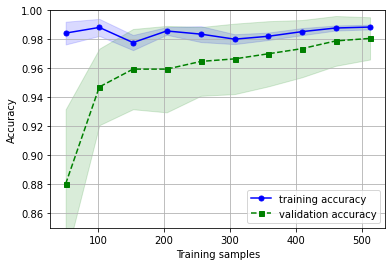

In [44]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2', random_state=1, max_iter=1000)
)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipeline,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.85, 1.0])

plt.show()

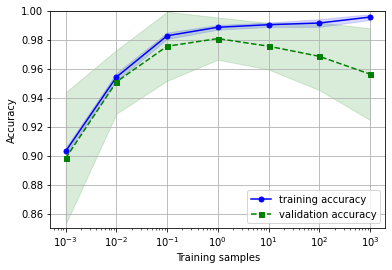

In [46]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

train_scores, test_scores = validation_curve(
    estimator=pipeline,
    X=X,
    y=y,
    cv=10,
    param_name='logisticregression__C',
    param_range=param_range
) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.85, 1.0])

plt.show()


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipeline_svc = make_pipeline(
    StandardScaler(),
    SVC(random_state=1)
)

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'svc__C': param_range, 'svc__kernel': ['linear']},
    {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}
]


gs = GridSearchCV(
    estimator=pipeline_svc,
    param_grid=param_grid,
    scoring='accuracy',
    refit=True,
    cv=10,
    n_jobs=-1
)

gs = gs.fit(X_train, y_train)
print('Best score: {:.4f}'.format(gs.best_score_))
print('Best params: {}'.format(gs.best_params_))
print('Test accuracy: {:.3f}'.format(gs.best_estimator_.score(X_test, y_test)))


Best score: 0.9818
Best params: {'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Test accuracy: 0.961


In [69]:
from sklearn.model_selection import cross_val_score
gs = GridSearchCV(estimator=pipeline_svc, param_grid=param_grid, scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

print('CV accuracy: {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(scores)))

CV accuracy: 0.9826 +/- 0.0213


In [75]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state=0)
param_grid = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}]

gs = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

print('CV accuracy: {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(scores)))

CV accuracy: 0.9032 +/- 0.0317


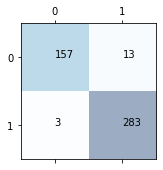

In [84]:
from sklearn.metrics import confusion_matrix
pipeline_svc.fit(X_train, y_train)

y_pred = pipeline_svc.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.4)

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j])

plt.xlabel
plt.show()

In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

print('Precision:\t{:.4f}'.format(precision))
print('Recall:\t\t{:.4f}'.format(recall))
print('F1:\t\t{:.4f}'.format(f1))


Precision:	0.9561
Recall:		0.9895
F1:		0.9725


In [100]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

scorer = make_scorer(f1_score, pos_label=0)
param_grid = [
    {'svc__C': param_range, 'svc__kernel': ['linear']},
    {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}
]

gs = GridSearchCV(
    estimator=pipeline_svc,
    param_grid=param_grid,
    scoring=scorer,
    cv=10,
    n_jobs=-1
)

gs = gs.fit(X_train, y_train)
print('Best score: {:.4f}'.format(gs.best_score_))
print('Best params: {}'.format(gs.best_params_))



Best score: 0.9750
Best params: {'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
